In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import json

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving USvideos.csv to USvideos.csv


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving US_category_id.json to US_category_id.json


In [ ]:
US = pd.read_csv('USvideos.csv')

In [ ]:
US.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


In [ ]:
US.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40949 entries, 0 to 40948
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                40949 non-null  object
 1   trending_date           40949 non-null  object
 2   title                   40949 non-null  object
 3   channel_title           40949 non-null  object
 4   category_id             40949 non-null  int64 
 5   publish_time            40949 non-null  object
 6   tags                    40949 non-null  object
 7   views                   40949 non-null  int64 
 8   likes                   40949 non-null  int64 
 9   dislikes                40949 non-null  int64 
 10  comment_count           40949 non-null  int64 
 11  thumbnail_link          40949 non-null  object
 12  comments_disabled       40949 non-null  bool  
 13  ratings_disabled        40949 non-null  bool  
 14  video_error_or_removed  40949 non-null  bool  
 15  de

In [ ]:
US.describe()

,category_id,views,likes,dislikes,comment_count
count,40949.000000,4.094900e+04,4.094900e+04,4.094900e+04,4.094900e+04
mean,19.972429,2.360785e+06,7.426670e+04,3.711401e+03,8.446804e+03
std,7.568327,7.394114e+06,2.288853e+05,2.902971e+04,3.743049e+04
min,1.000000,5.490000e+02,0.000000e+00,0.000000e+00,0.000000e+00
25%,17.000000,2.423290e+05,5.424000e+03,2.020000e+02,6.140000e+02
50%,24.000000,6.818610e+05,1.809100e+04,6.310000e+02,1.856000e+03
75%,25.000000,1.823157e+06,5.541700e+04,1.938000e+03,5.755000e+03
max,43.000000,2.252119e+08,5.613827e+06,1.674420e+06,1.361580e+06


In [ ]:
print("Shape of the dataset:", US.shape)

Shape of the dataset: (40949, 16)


#Data integrity

In [ ]:
print(US.dtypes)

video_id                  object
trending_date             object
title                     object
channel_title             object
category_id                int64
publish_time              object
tags                      object
views                      int64
likes                      int64
dislikes                   int64
comment_count              int64
thumbnail_link            object
comments_disabled           bool
ratings_disabled            bool
video_error_or_removed      bool
description               object
dtype: object


In [ ]:
US['trending_date'] = pd.to_datetime(US['trending_date'], format='%y.%d.%m')
US['publish_time'] = pd.to_datetime(US['publish_time'])


#Handling missing values and duplicates

In [ ]:
print(US.isnull().sum())

video_id                    0
trending_date               0
title                       0
channel_title               0
category_id                 0
publish_time                0
tags                        0
views                       0
likes                       0
dislikes                    0
comment_count               0
thumbnail_link              0
comments_disabled           0
ratings_disabled            0
video_error_or_removed      0
description               570
dtype: int64


In [ ]:
US.dropna(subset=['description'], inplace=True)

In [ ]:
print(US.isnull().sum())

video_id                  0
trending_date             0
title                     0
channel_title             0
category_id               0
publish_time              0
tags                      0
views                     0
likes                     0
dislikes                  0
comment_count             0
thumbnail_link            0
comments_disabled         0
ratings_disabled          0
video_error_or_removed    0
description               0
dtype: int64


In [ ]:
duplicates = US.duplicated().sum()
print("Number of duplicate rows:", duplicates)

Number of duplicate rows: 47


In [ ]:
US = US.drop_duplicates()

In [ ]:
duplicates = US.duplicated().sum()
print("Number of duplicate rows:", duplicates)

Number of duplicate rows: 0


In [ ]:
with open('US_category_id.json', 'r') as f:
    US_json = json.load(f)

In [ ]:
US_json = pd.DataFrame(US_json)

US_json.head()


,kind,etag,items
0,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
1,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
2,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
3,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
4,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."


In [ ]:
print(US_json.columns)

Index(['kind', 'etag', 'items'], dtype='object')


In [ ]:
# Converting JSON to a DataFrame
categories_df = pd.DataFrame(US_json["items"])

categories_df = pd.DataFrame(list(categories_df['items']))
categories_df = categories_df[["id", "snippet"]].copy()
categories_df["category_name"] = categories_df["snippet"].apply(lambda x: x["title"])
categories_df = categories_df[["id", "category_name"]].copy()
categories_df.rename(columns={"id": "category_id"}, inplace=True)
categories_df["category_id"] = categories_df["category_id"].astype(str)


if 'category_id' not in US.columns:
    if 'id' in US.columns:
        US.rename(columns={'id': 'category_id'}, inplace=True)

    else:
        print(f"Error: Column named 'category_id' or similar is missing in the US DataFrame")
        print(f"Existing US columns: {US.columns.to_list()}")

US["category_id"] = US["category_id"].astype(str)

US = US.merge(categories_df, on='category_id', how='left')
US.drop(columns=['category_id'], inplace=True)
print(US.head())

      video_id trending_date  \
0  2kyS6SvSYSE    2017-11-14   
1  1ZAPwfrtAFY    2017-11-14   
2  5qpjK5DgCt4    2017-11-14   
3  puqaWrEC7tY    2017-11-14   
4  d380meD0W0M    2017-11-14   

                                               title          channel_title  \
0                 WE WANT TO TALK ABOUT OUR MARRIAGE           CaseyNeistat   
1  The Trump Presidency: Last Week Tonight with J...        LastWeekTonight   
2  Racist Superman | Rudy Mancuso, King Bach & Le...           Rudy Mancuso   
3                   Nickelback Lyrics: Real or Fake?  Good Mythical Morning   
4                           I Dare You: GOING BALD!?               nigahiga   

               publish_time  \
0 2017-11-13 17:13:01+00:00   
1 2017-11-13 07:30:00+00:00   
2 2017-11-12 19:05:24+00:00   
3 2017-11-13 11:00:04+00:00   
4 2017-11-12 18:01:41+00:00   

                                                tags    views   likes  \
0                                    SHANtell martin   748374   57527   

In [ ]:
US_count_df = pd.DataFrame(US.groupby("category_name").count(), columns=["video_id"])
US_count_df = US_count_df.rename(columns={"video_id": "count"})
US_count_df

,count
category_name,
Autos & Vehicles,379
Comedy,3431
Education,1641
Entertainment,9799
Film & Animation,2338
Gaming,802
Howto & Style,4136
Music,6432
News & Politics,2407


In [ ]:
group_by_category = US.groupby('category_name')
likes_count = group_by_category['likes'].sum()
likes_count


,likes
category_name,
Autos & Vehicles,4244815
Comedy,215261189
Education,49247234
Entertainment,519903727
Film & Animation,165586672
Gaming,68556800
Howto & Style,162505607
Music,1408871678
News & Politics,17760924


In [ ]:
dislikes_count = group_by_category['dislikes'].sum()
dislikes_count

,dislikes
category_name,
Autos & Vehicles,242903
Comedy,7199730
Education,1351607
Entertainment,33613071
Film & Animation,6070311
Gaming,9147256
Howto & Style,5462106
Music,51016380
News & Politics,3944777


In [ ]:
comment_count = group_by_category['comment_count'].sum()
comment_count

,comment_count
category_name,
Autos & Vehicles,784408
Comedy,22353385
Education,5440512
Entertainment,65074068
Film & Animation,17875945
Gaming,14697393
Howto & Style,23093354
Music,124623432
News & Politics,5826378


In [ ]:
views_count = group_by_category['views'].sum()
views_count

,views
category_name,
Autos & Vehicles,520475457
Comedy,5091160909
Education,1179807180
Entertainment,20312758207
Film & Animation,7266276404
Gaming,2112469965
Howto & Style,4070186824
Music,39969138974
News & Politics,1446807411


#Standardization

In [ ]:
from sklearn.preprocessing import StandardScaler
#numerical columns
numerical_cols = ['views', 'likes', 'dislikes', 'comment_count']

#StandardScaler
scaler = StandardScaler()

US[numerical_cols] = scaler.fit_transform(US[numerical_cols])

In [ ]:
US['trending_date'] = pd.to_datetime(US['trending_date'], errors='coerce')

US['trending_year'] = US['trending_date'].dt.year
US['trending_month'] = US['trending_date'].dt.month
US['trending_day'] = US['trending_date'].dt.day

#Outlier detection

The method chosen to identify outliers is the standard deviation method. After identifying, the IQR method will be employed to addressed the outliers because it handles outliers based on the spread of the data. After addressing the outliers, a box plot will be used to visualize the final result.

threshold = 3

**1. views**

In [ ]:
threshold = 3
mean = US['views'].mean()
std = US['views'].std()

US['outlier_flag'] = (US['views'] - mean).abs() > threshold * std

outliers = US[US['outlier_flag']]
print("Outliers:")
print(outliers)

Outliers:
          video_id trending_date  \
68     2Vv-BfVoq4g    2017-11-14   
331    2Vv-BfVoq4g    2017-11-15   
567    2Vv-BfVoq4g    2017-11-16   
982    n1WpP7iowLc    2017-11-18   
992    TyHvyGVs42U    2017-11-19   
...            ...           ...   
40253  xTlNMmZKwpA    2018-06-14   
40259  1J76wN0TPI4    2018-06-14   
40291  aEM2kOrrNJI    2018-06-14   
40309  QgOXIEhHU1Y    2018-06-14   
40322  n_W54baizX8    2018-06-14   

                                                   title      channel_title  \
68           Ed Sheeran - Perfect (Official Music Video)         Ed Sheeran   
331          Ed Sheeran - Perfect (Official Music Video)         Ed Sheeran   
567          Ed Sheeran - Perfect (Official Music Video)         Ed Sheeran   
982           Eminem - Walk On Water (Audio) ft. Beyoncé         EminemVEVO   
992            Luis Fonsi, Demi Lovato - Échame La Culpa      LuisFonsiVEVO   
...                                                  ...                ...   
4025

In [ ]:
Q1 = US['views'].quantile(0.25)
Q3 = US['views'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_cleaned = US[(US['views'] >= lower_bound) & (US['views'] <= upper_bound)]

Text(0.5, 1.0, 'Box Plot after Outlier Removal')

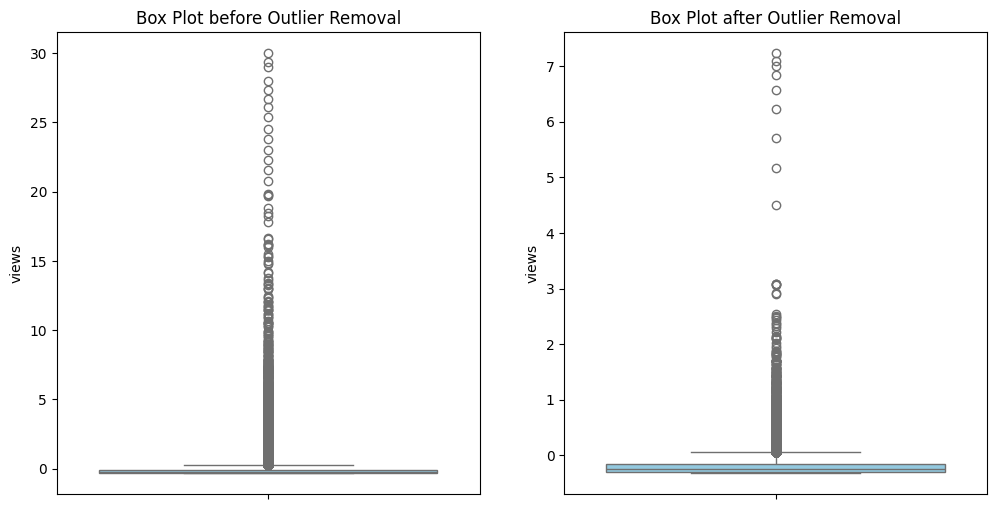

In [ ]:
#distribution of the data before and after outlier removal
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(y=US['views'], color ='skyblue')
plt.title('Box Plot before Outlier Removal')

plt.subplot(1, 2, 2)
sns.boxplot(y=df_cleaned['views'], color='skyblue')
plt.title('Box Plot after Outlier Removal')

**2. likes**

In [ ]:
threshold = 3
mean = US['likes'].mean()
std = US['likes'].std()

US['outlier_flag'] = (US['likes'] - mean).abs() > threshold * std

outliers = US[US['outlier_flag']]
print("Outliers:")
print(outliers)

Outliers:
          video_id trending_date  \
32     n1WpP7iowLc    2017-11-14   
68     2Vv-BfVoq4g    2017-11-14   
147    9wg3v-01yKQ    2017-11-14   
294    n1WpP7iowLc    2017-11-15   
331    2Vv-BfVoq4g    2017-11-15   
...            ...           ...   
40239  D_6QmL6rExk    2018-06-14   
40253  xTlNMmZKwpA    2018-06-14   
40259  1J76wN0TPI4    2018-06-14   
40280  nQySbNGu4g0    2018-06-14   
40309  QgOXIEhHU1Y    2018-06-14   

                                                   title    channel_title  \
32            Eminem - Walk On Water (Audio) ft. Beyoncé       EminemVEVO   
68           Ed Sheeran - Perfect (Official Music Video)       Ed Sheeran   
147                                  Harry Styles - Kiwi  HarryStylesVEVO   
294           Eminem - Walk On Water (Audio) ft. Beyoncé       EminemVEVO   
331          Ed Sheeran - Perfect (Official Music Video)       Ed Sheeran   
...                                                  ...              ...   
40239  BTS (방탄소년단)

In [ ]:
Q1 = US['likes'].quantile(0.25)
Q3 = US['likes'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_cleaned = US[(US['likes'] >= lower_bound) & (US['likes'] <= upper_bound)]

Text(0.5, 1.0, 'Box Plot after Outlier Removal')

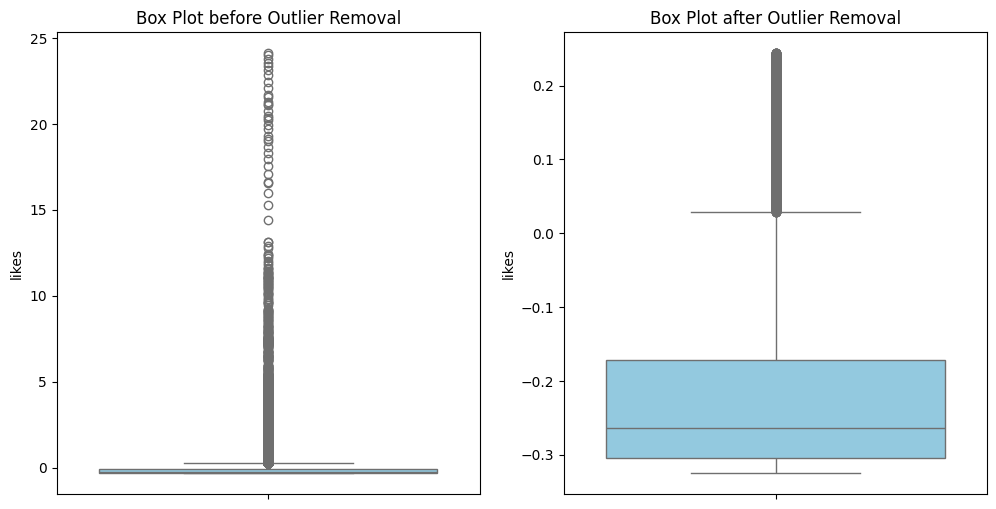

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(y=US['likes'], color ='skyblue')
plt.title('Box Plot before Outlier Removal')

plt.subplot(1, 2, 2)
sns.boxplot(y=df_cleaned['likes'], color='skyblue')
plt.title('Box Plot after Outlier Removal')

**3. dislikes**

In [ ]:
threshold = 3
mean = US['dislikes'].mean()
std = US['dislikes'].std()

US['outlier_flag'] = (US['dislikes'] - mean).abs() > threshold * std

outliers = US[US['outlier_flag']]
print("Outliers:")
print(outliers)

Outliers:
          video_id trending_date  \
1442   TyHvyGVs42U    2017-11-21   
1674   TyHvyGVs42U    2017-11-22   
1914   TyHvyGVs42U    2017-11-23   
2109   TyHvyGVs42U    2017-11-24   
2318   TyHvyGVs42U    2017-11-25   
...            ...           ...   
40193  GnGPAYvve1A    2018-06-14   
40208  J2HytHu5VBI    2018-06-14   
40253  xTlNMmZKwpA    2018-06-14   
40260  Tn8hOPeAnIM    2018-06-14   
40331  ooyjaVdt-jA    2018-06-14   

                                                   title      channel_title  \
1442           Luis Fonsi, Demi Lovato - Échame La Culpa      LuisFonsiVEVO   
1674           Luis Fonsi, Demi Lovato - Échame La Culpa      LuisFonsiVEVO   
1914           Luis Fonsi, Demi Lovato - Échame La Culpa      LuisFonsiVEVO   
2109           Luis Fonsi, Demi Lovato - Échame La Culpa      LuisFonsiVEVO   
2318           Luis Fonsi, Demi Lovato - Échame La Culpa      LuisFonsiVEVO   
...                                                  ...                ...   
4019

In [ ]:
Q1 = US['dislikes'].quantile(0.25)
Q3 = US['dislikes'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_cleaned = US[(US['dislikes'] >= lower_bound) & (US['dislikes'] <= upper_bound)]

Text(0.5, 1.0, 'Box Plot after Outlier Removal')

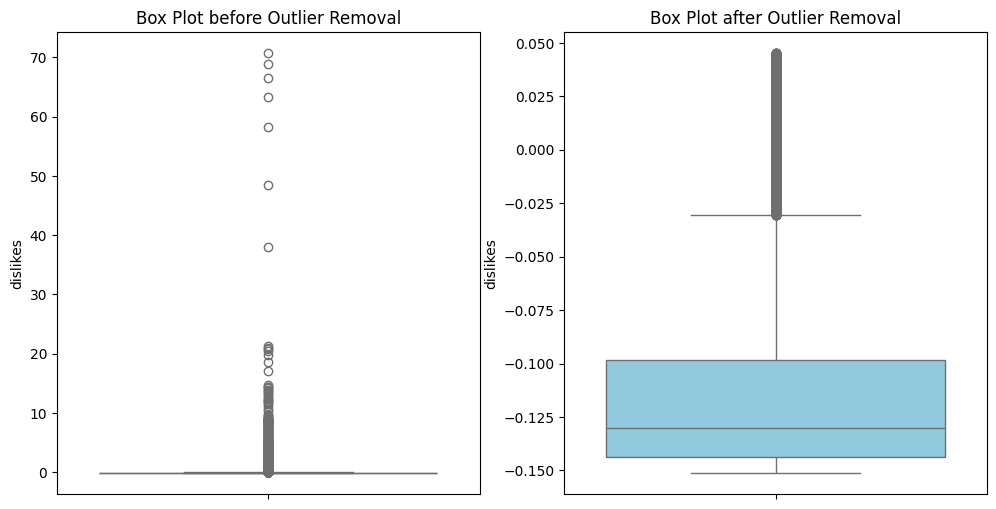

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(y=US['dislikes'], color ='skyblue')
plt.title('Box Plot before Outlier Removal')

plt.subplot(1, 2, 2)
sns.boxplot(y=df_cleaned['dislikes'], color='skyblue')
plt.title('Box Plot after Outlier Removal')

**4. comment_count**

In [ ]:
threshold = 3
mean = US['comment_count'].mean()
std = US['comment_count'].std()

US['outlier_flag'] = (US['comment_count'] - mean).abs() > threshold * std

outliers = US[US['outlier_flag']]
print("Outliers:")
print(outliers)

Outliers:
          video_id trending_date  \
32     n1WpP7iowLc    2017-11-14   
294    n1WpP7iowLc    2017-11-15   
527    n1WpP7iowLc    2017-11-16   
756    n1WpP7iowLc    2017-11-17   
982    n1WpP7iowLc    2017-11-18   
...            ...           ...   
40033  D_6QmL6rExk    2018-06-13   
40126  ooyjaVdt-jA    2018-06-13   
40208  J2HytHu5VBI    2018-06-14   
40239  D_6QmL6rExk    2018-06-14   
40331  ooyjaVdt-jA    2018-06-14   

                                                   title channel_title  \
32            Eminem - Walk On Water (Audio) ft. Beyoncé    EminemVEVO   
294           Eminem - Walk On Water (Audio) ft. Beyoncé    EminemVEVO   
527           Eminem - Walk On Water (Audio) ft. Beyoncé    EminemVEVO   
756           Eminem - Walk On Water (Audio) ft. Beyoncé    EminemVEVO   
982           Eminem - Walk On Water (Audio) ft. Beyoncé    EminemVEVO   
...                                                  ...           ...   
40033  BTS (방탄소년단) 'FAKE LOVE' Official

In [ ]:
Q1 = US['comment_count'].quantile(0.25)
Q3 = US['comment_count'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_cleaned = US[(US['comment_count'] >= lower_bound) & (US['comment_count'] <= upper_bound)]

Text(0.5, 1.0, 'Box Plot after Outlier Removal')

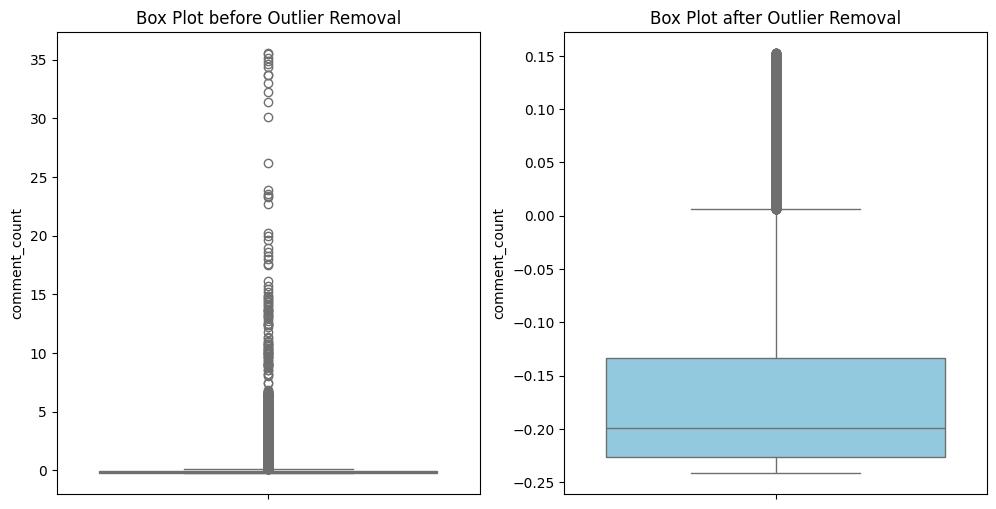

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(y=US['comment_count'], color ='skyblue')
plt.title('Box Plot before Outlier Removal')

plt.subplot(1, 2, 2)
sns.boxplot(y=df_cleaned['comment_count'], color='skyblue')
plt.title('Box Plot after Outlier Removal')

In [ ]:
# Saving cleaned Data to a new CSV file
US.to_csv('cleaned_USvideos.csv', index=False)

In [ ]:
import pandas as pd
df_cleaned = pd.read_csv('cleaned_USvideos.csv')

In [ ]:
from google.colab import files
files.download('cleaned_USvideos.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>